In [480]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\12403\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [481]:
class ReLU_network():
    def __init__(self, x,y, layerDimensions):
        self.parameters = {} #Creating a Python Dictonary to Hold Weight and Bias Parameters.
        self.L = len(layerDimensions)  #Number of Layers in the Network.
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = np.random.randn(layerDimensions[l], layerDimensions[l-1])
            self.parameters['b' + str(l)] = np.random.randn(layerDimensions[l], 1)
        self.A = {}
        self.Z = {}
        self.y = y
        self.x = x
        self.Z['Z0'] = x
        self.deltas = {}
        
            
    def ReLU(self, Z):
        return np.maximum(Z, 0)
    
    def Feedforward(self, X):
        self.A['A0'] = X
        for l in range(1, self.L):
            self.Count = l
            self.Z['Z' + str(l)] = np.dot(self.A['A' + str(l-1)], self.parameters['W' + str(l)].T ) + self.parameters['b' + str(l)].T
            self.A['A' + str(l)] = self.ReLU(self.Z['Z' + str(l)])   
        return self.A['A' + str(self.L - 1)]
        
    
    def dReLU(self, Z):
        return 1.* (Z>0)
    
    def costFunction(self):
        self.A['A0'] = self.x
        self.A['A'+ str(self.L-1)] = self.Feedforward(self.x)
        Cost = 0.5*np.sum((self.y - self.A['A'+ str(self.L-1)])**2)
        return Cost
    
    
    def deltaCost(self):
        L = self.L
        
        self.A['A'+ str(L-1)] = self.Feedforward(self.x)
        self.deltas['delta' + str(L-1)] = np.multiply(-(self.y - self.A['A'+ str(self.L-1)]), self.dReLU(self.Z['Z'+ str(self.L-1)]))
        
        for l in range(L-1, 0, -1):
            self.deltas['dW' + str(l)] = np.dot(self.A['A' + str(l-1)].T, self.deltas["delta" + str(l)])
            self.deltas['db' + str(l)] = np.sum(self.deltas["delta" + str(l)])
            
            self.deltas["delta" + str(l-1)] = np.multiply(np.dot(self.deltas["delta" + str(l)], self.parameters['W' + str(l)] ), self.dReLU(self.Z['Z' + str(l-1)]))
        return self.deltas
    
    def UpdateParameters(self):
        for l in range(1,self.L):
            self.parameters['W' + str(l)] = self.parameters['W' + str(l)] - (alpha * self.deltas['dW' + str(l)]).T
            self.parameters['b' + str(l)] = self.parameters['b' + str(l)] - (alpha * self.deltas['db' + str(l)]).T
        

               

In [482]:
def GenerateTestData(Size):
    x1 = np.linspace(-np.pi, (np.pi*5), Size).reshape(Size, 1)
    x2 = np.linspace(np.pi, (-np.pi*5), Size).reshape(Size, 1)
    y = np.sin(x1) + np.cos(x2+5)
    x = np.concatenate((x1,x2), axis=1)
    return x, y

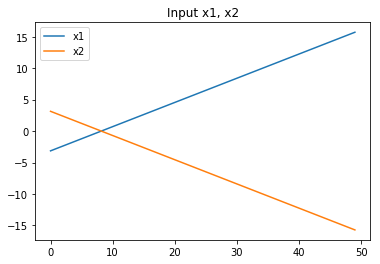

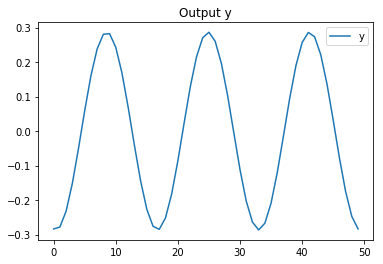

In [483]:
x,y = GenerateTestData(50)
plot(x)
title("Input x1, x2")
legend(['x1', 'x2'])
figure()
title("Output y")
plot(y)
legend(['y'])

In [484]:
NN = ReLU_network(x, y, [2,4,4,3,1])

"""
This means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.
"""


'\nThis means 5 input parameters. 4 Neurons in the first (Hidden) layer, and 3 Neurons in second (Output) layer.\n'

In [485]:
# This is how you access dictionary parameters:
# NN.parameters[W1]

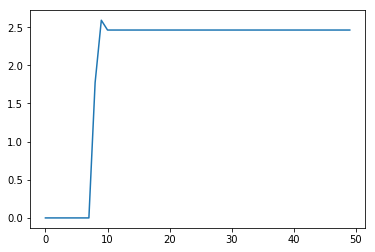

In [486]:

Output = NN.Feedforward(x)
plot(Output)

In [487]:
cost = NN.costFunction()
cost

126.76682212054031

In [488]:
delta = NN.deltaCost()

Final Cost = 1.017670154219344


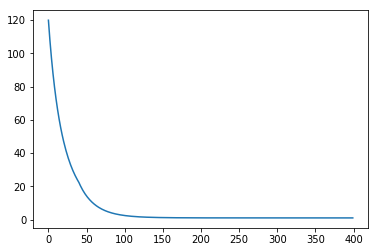

In [489]:
NumOfIterations = 400
alpha = 0.0001
CostTracker = np.zeros(NumOfIterations)
for i in range(NumOfIterations):
    deltas = NN.deltaCost()
    NN.UpdateParameters()
    Output_New = NN.Feedforward(x)
    CostTracker[i] = NN.costFunction()

plot(CostTracker)
print("Final Cost = " + str(CostTracker[NumOfIterations-1]))

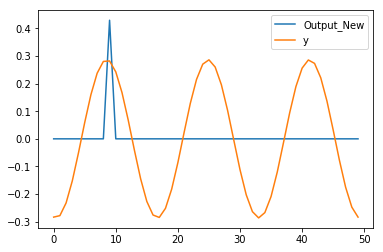

In [490]:
plot(Output_New)
plot(y)
legend(['Output_New', 'y'])